In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco_customer_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.shape


(7043, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [7]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [8]:
df['Total Charges'].dtype

dtype('float64')

In [9]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [10]:
df = df.dropna(subset=['Total Charges'])

In [11]:
df.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [12]:
df = df.drop(columns=['Churn Reason'])

In [13]:
df = df.drop(columns=['Churn Label'])

In [14]:
df.shape

(7032, 31)

In [15]:
df['Churn Value'].value_counts()

,count
Churn Value,
0,5163
1,1869


In [16]:
df['Churn Value'].value_counts(normalize=True) * 100

,proportion
Churn Value,
0,73.421502
1,26.578498


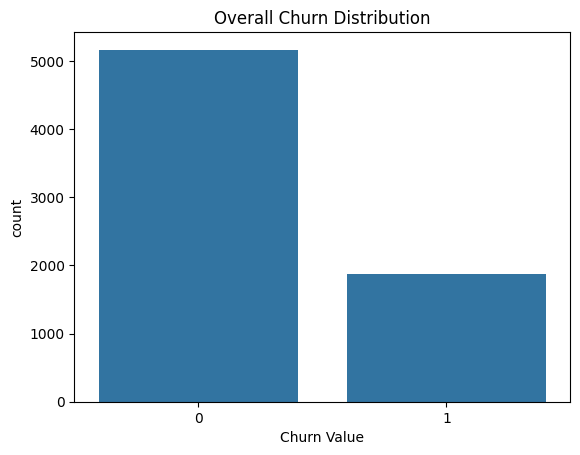

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Value', data=df)
plt.title("Overall Churn Distribution")
plt.show()

Around 26.6% of customers have churned, while 73.4% remained with the company. This indicates moderate customer attrition and highlights the need to analyze churn drivers.

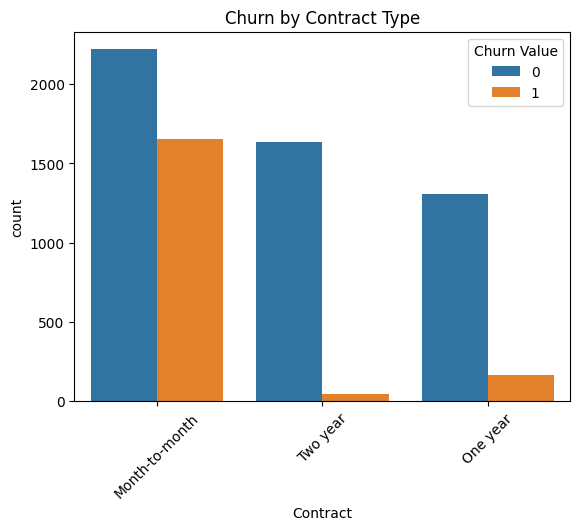

In [18]:
sns.countplot(x='Contract', hue='Churn Value', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

Customers with Month-to-month contracts have significantly higher churn compared to customers with One-year or Two-year contracts. Long-term contracts show strong customer retention.

Short-term contracts allow customers to leave easily.

Long-term contracts increase customer commitment.

Offering discounts on yearly plans may reduce churn.

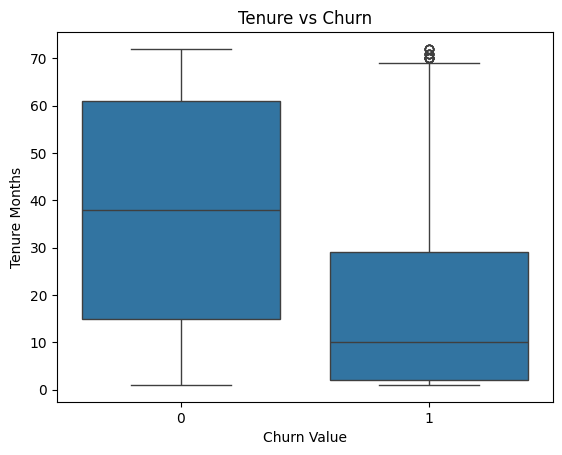

In [19]:
sns.boxplot(x='Churn Value', y='Tenure Months', data=df)
plt.title("Tenure vs Churn")
plt.show()

Customers with lower tenure (especially less than 12 months) are more likely to churn. Long-term customers show significantly higher retention.
New customers are at high risk.
First 6–12 months are critical.
Company should improve onboarding experience.
Offer early loyalty discounts.

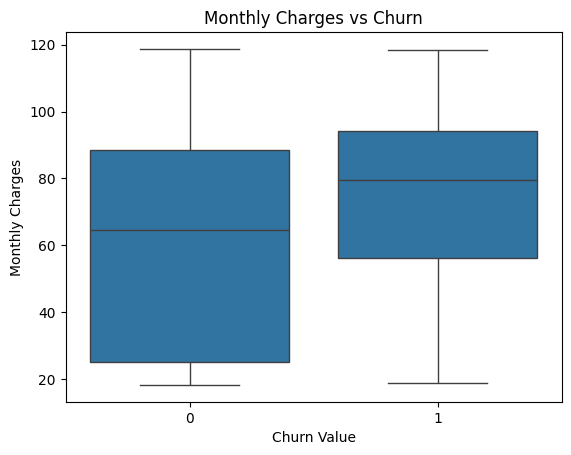

In [20]:
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Customers with higher monthly charges are more likely to churn. Price sensitivity appears to be a significant factor influencing customer attrition.
Customers paying higher fees may feel the service is expensive.

Competitors might offer cheaper alternatives.
Company should:
Offer loyalty discounts
Bundle services
Provide value-based pricing

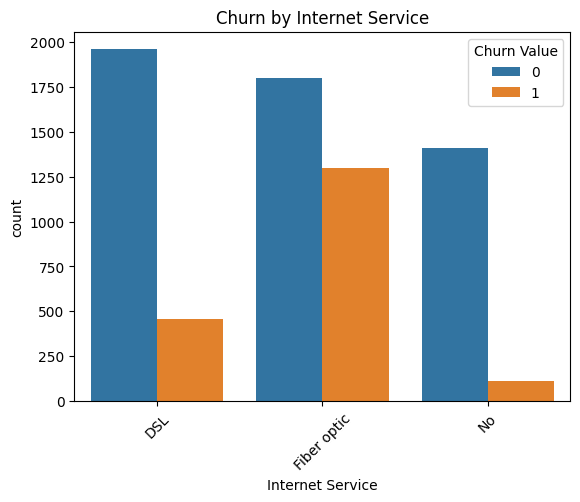

In [21]:
sns.countplot(x='Internet Service', hue='Churn Value', data=df)
plt.title("Churn by Internet Service")
plt.xticks(rotation=45)
plt.show()

In [22]:
df.groupby('Payment Method')['Churn Value'].mean() * 100

,Churn Value
Payment Method,
Bank transfer (automatic),16.731518
Credit card (automatic),15.253123
Electronic check,45.285412
Mailed check,19.201995


Electronic check users may not be on auto-payment.

Auto-payment users (credit card / bank transfer) show lower churn.

Encouraging auto-pay discounts could reduce churn.

In [23]:
df.groupby('Senior Citizen')['Churn Value'].mean() * 100

,Churn Value
Senior Citizen,
No,23.650255
Yes,41.681261


Senior citizens show a significantly higher churn rate (~41%) compared to non-senior customers. This suggests the need for targeted retention strategies for elderly customers.

In [24]:
df.to_csv("cleaned_churn_data.csv", index=False)